<a href="https://colab.research.google.com/github/alexandreLoureiro/financas/blob/main/Classifica%C3%A7%C3%A3o_e_explora%C3%A7%C3%A3o_de_textos_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação e exploração de textos financeiros

- Base de dados: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
- Equbot: https://equbot.com/

## Importação das bibliotecas

In [ ]:
!pip install spacy==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
spacy.__version__

'2.2.4'

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re

## Carregamento da base de dados

In [ ]:
base = pd.read_csv('/content/stock_data.csv')

In [ ]:
base.shape

(5791, 2)

In [ ]:
base.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
base.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [ ]:
np.unique(base['Sentiment'], return_counts=True)

(array([-1,  1]), array([2106, 3685]))

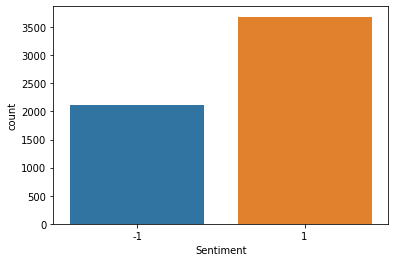

In [ ]:
sns.countplot(x = base['Sentiment']);

In [ ]:
base.isnull().sum()

Text         0
Sentiment    0
dtype: int64

## Função para pré-processamento dos textos

In [ ]:
!python -m spacy download pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
spacy.load('pt')

In [ ]:
print(spacy.lang.pt.stop_words.STOP_WORDS)

{'nem', 'algumas', 'exemplo', 'quieta', 'todo', 'todos', 'minhas', 'vossa', 'mês', 'às', 'sois', 'mil', 'dezoito', 'podia', 'nas', 'sistema', 'desse', 'vários', 'meio', 'tivemos', 'possivelmente', 'talvez', 'partir', 'conselho', 'só', 'dentro', 'fostes', 'isto', 'estava', 'puderam', 'terceira', 'inclusive', 'porque', 'nossas', 'antes', 'tal', 'deverá', 'parece', 'dez', 'longe', 'novas', 'sei', 'nada', 'até', 'teus', 'me', 'foste', 'local', 'parte', 'terceiro', 'sou', 'tu', 'disso', 'seus', 'números', 'esses', 'outras', 'aos', 'apoia', 'segundo', 'três', 'está', 'fomos', 'mais', 'minha', 'elas', 'faço', 'estou', 'vocês', 'cima', 'ambos', 'como', 'pois', 'foi', 'fará', 'estiveste', 'tive', 'acerca', 'eles', 'relação', 'estas', 'isso', 'seu', 'sétima', 'seria', 'para', 'de', 'nessa', 'sobre', 'cujo', 'quanto', 'grandes', 'pouca', 'suas', 'novos', 'tipo', 'tanto', 'nós', 'dizem', 'pontos', 'aquele', 'deve', 'dos', 'momento', 'direita', 'põem', 'próxima', 'estás', 'for', 'és', 'favor', 'tud

In [ ]:
!python -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 18.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
pln = spacy.load('en')
pln

In [ ]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words)

{'whereas', 'used', 'part', 'should', 'always', 'though', 'various', 'themselves', 'in', 'most', 'both', 'namely', 'very', 'hereafter', 'thru', 'are', 'fifteen', 'then', "'ve", 'after', 'might', 'own', 'get', 'of', 'hence', 'by', 'me', 'show', 'whereupon', 'may', 'thence', 'too', 'she', 'just', 'everywhere', 'whatever', 'done', 'moreover', 'therefore', 'herself', 'per', 'he', 'bottom', 'himself', 'your', 'were', "'ll", 'rather', 'becomes', "n't", 'ten', 'against', 'herein', 'around', 'all', 'anything', 'you', 'whereafter', 'front', 'afterwards', 'enough', '’ll', 'these', 'nowhere', 'empty', 'least', 'besides', 'eight', 'from', 'the', 'could', 'for', 'towards', "'m", 'ever', 'hereby', 'what', 'yours', 'wherein', 're', 'every', 'full', 'nine', 'three', 'whether', 'well', 'everyone', 'whence', 'which', 'see', 'along', 'became', 'thereupon', '’ve', 'our', 'until', 'was', 'during', 'we', 'yourself', 'been', 'name', 'much', 'latterly', 'something', 'already', 'few', '‘m', 'take', 'neither', 

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
preprocessamento('I will @test9&+ buy the https://www.iaexpert.academy Apple stock. 9 8 care. caring! car')

'buy apple stock care care car'

## Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [ ]:
base['Text'] = base['Text'].apply(preprocessamento)

In [ ]:
base.head(10)

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1
5,pgnx 3.04,1
6,aap user current downtrend break short term co...,-1
7,monday relative weakness nyx win tie tap ice i...,-1
8,goog ower trend line channel test volume support,1
9,aap watch tomorrow ong entry,1


## Visualização e exploração

### Número médio de caracteres

In [ ]:
base['tamanho'] = base['Text'].apply(len)
base.head()

,Text,Sentiment,tamanho
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1,81
1,user aap movie return fea geed indicator trade...,1,59
2,user -PRON- afraid short amzn -PRON- look like...,1,89
3,mnta 12.00,1,10
4,oi 21.37,1,8


In [ ]:
base['tamanho'].describe()

count    5791.000000
mean       50.535313
std        24.960696
min         0.000000
25%        31.000000
50%        50.000000
75%        69.000000
max       129.000000
Name: tamanho, dtype: float64

In [ ]:
positivo = base[base['Sentiment'] == 1]

In [ ]:
positivo['tamanho'].describe()

count    3685.000000
mean       49.721031
std        24.948346
min         0.000000
25%        30.000000
50%        48.000000
75%        68.000000
max       129.000000
Name: tamanho, dtype: float64

In [ ]:
negativo = base[base['Sentiment'] == -1]

In [ ]:
negativo['tamanho'].describe()

count    2106.000000
mean       51.960114
std        24.924272
min         2.000000
25%        32.250000
50%        51.000000
75%        71.000000
max       123.000000
Name: tamanho, dtype: float64

### Nuvem de palavras

In [ ]:
textos_positivos = positivo['Text'].tolist()
len(textos_positivos)

3685

In [ ]:
textos_positivos[0:10]

['kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service',
 'mnta 12.00',
 'oi 21.37',
 'pgnx 3.04',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 '-PRON- assume fcx open tomorrow 34.25 trigger buy like setup',
 '-PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm']

In [ ]:
textos_positivos_string = ' '.join(textos_positivos)

In [ ]:
textos_positivos_string

"kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post user aap movie return fea geed indicator trade year awesome user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service mnta 12.00 oi 21.37 pgnx 3.04 goog ower trend line channel test volume support aap watch tomorrow ong entry -PRON- assume fcx open tomorrow 34.25 trigger buy like setup -PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm aap gamco arry haverty apple extremely cheap great video user maykiljil post agree msft higher possibly north momentum come etfc break ma200 resistance solid volume friday ong set ha hit 35.65 mean resume target level .. user gameplan shoot today like trend break c+h break oc weekly trend break july fcx gapping ideal entry look pull open entry user great list particularly like fisv syk buy hold type check free list athx upper trend line ng nice pnf breakout need follow x swing swy float s

In [ ]:
len(textos_positivos_string)

186906

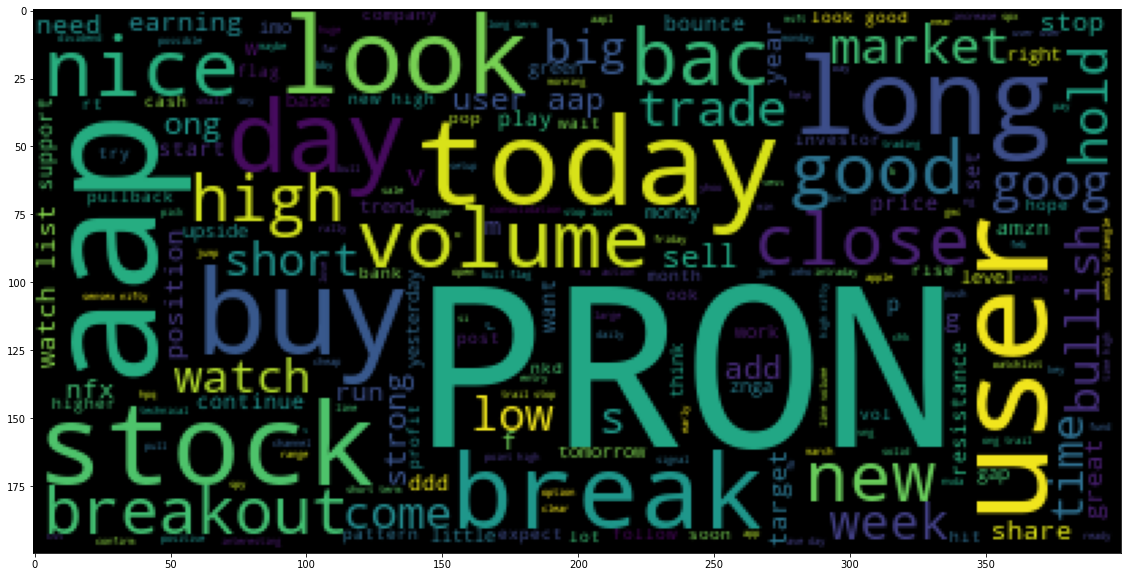

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_positivos_string));

In [ ]:
lista_negativo = negativo['Text'].tolist()
textos_negativos_string = ' '.join(lista_negativo)

In [ ]:
len(textos_negativos_string)

111533

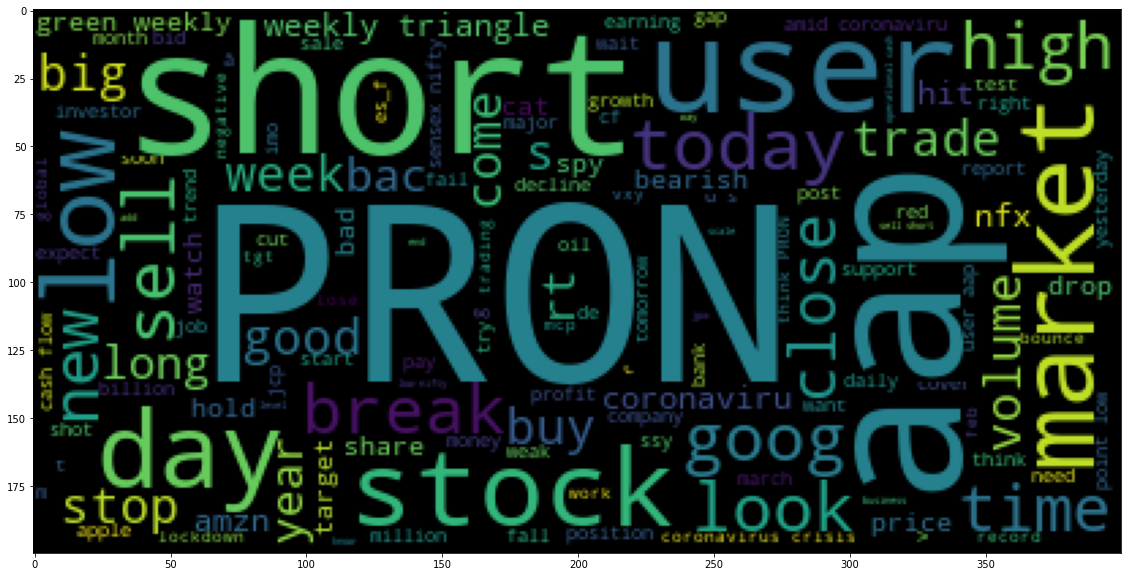

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_negativos_string));

### Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
documento = pln(textos_positivos_string)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
empresas_positivas = []
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_positivas.append(entidade.text)

aap ORG
mnta ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
axa ORG
aap ORG
aap ORG
ebay ORG
aap ORG
aap ORG
msft compq new post ORG
aap ORG
ebay ORG
vbd xide ORG
isi aig nice bull ORG
pfe ORG
aap ORG
es_f ORG
spx ORG
huston -PRON- ORG
aap ORG
triangle ORG
fibs ORG
vng huge news patent ORG
vng ORG
gm ORG
vng post nice ORG
oas ORG
mca ORG
aap ORG
aap ORG
ftc ORG
vng ORG
aap ORG
aap ORG
mye ORG
aap ORG
vey ORG
fed ORG
nvda bounce continue stock ORG
rising.obv ORG
ong aapl ORG
amzn daily ORG
sma ORG
sma ORG
aap ORG
axa ORG
aap ORG
aap ORG
aap ORG
ford ORG
ford ORG
pa bank ORG
pick bac c san gs ORG
ceg ORG
aap ORG
ceg ORG
11.50 ORG
triangle ORG
ceg ORG
ceg ORG
avg ORG
aap ORG
aap ORG
obv ORG
aap ORG
avg day ORG
aap ORG
kog ORG
aap ORG
triangle acad ORG
spx +1.90 mo later -PRON- week ORG
sma ORG
voc ORG
aap ORG
aap ORG
intel guess ORG
aap ORG
aap ORG
s&p ORG
aap ORG
bullish cross ORG
obv ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
aap ORG
aap ORG
aap ORG
ssys ORG
aap ORG
aap ORG
vey green

In [ ]:
len(empresas_positivas)

1050

In [ ]:
empresas_positivas = set(empresas_positivas)

In [ ]:
len(empresas_positivas)

364

In [ ]:
print(empresas_positivas)

{'divorce qqq', 'goldman sachs \n  ', '~think', 'treasury', 'bgcp nice', 'ed daily', 'sfy', 'etf inch', 'cbi', 'ock star direct tv', 'nti', 'kbh break', 'ssys', 'morgan stanley', 'avg day', 'bac bank', 'ec', 'triangle gte', 'ttmi watch list continuation trade', 'cld', 'div inc', 'bull', 'spartans debit card', 'pa bank', 'nis nn anth', 'min triple doji aap news', '¦ federal reserve', 'wk', 'isg', 'abc', 'gdi technica tade watch', 'triangle pby', 'mdz', 'ios', 'nvda bounce continue stock', 'aap', 'ftc', 'fda', 'depo bounce fibo line', 'axa', 'financial energy pharma', 'coronavirus', 'sma cross', 'omex', '/t', 'tx ec', 'triangle cytx', 'triangle heo', 'momentum hbi watch', 'bac', 'ibm', 'microsoft ebay', 'snt', 'ffiv', 'kex', 'nvda', 'dva nice', 'great :)', 'pan hard paint', 'cst', 'ave', 'dow jones', 'nc corp ed weekly', 'oxgn stock majort', 'wall street bank', 'hee qcom', 'nbs', 'amzn daily', 'nfx swy', 'intraday tap', 'qqq', 'eod yest', 'mtg', 'states steel corp', 'ng_f', 'micron nvidi

In [ ]:
empresas_negativas = []
documento = pln(textos_negativos_string)
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_negativas.append(entidade.text)

aap ORG
nyx ORG
aap ORG
nkd ORG
phm ORG
coh ORG
bwd ORG
aig american international group ORG
sony ORG
wtw ORG
aap ORG
fed ORG
es_f ORG
aap ORG
aap ORG
aap ORG
obv ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
nvda enko view red dead ORG
sma ORG
aap ORG
triangle ORG
aap ORG
es_f ORG
triangle heo ORG
aap ORG
aap ORG
triangle ktos ORG
skx ORG
triangle ORG
ish jpm 1st ORG
triangle ORG
triangle ORG
triangle ORG
south yum ORG
es_f ORG
fio air ORG
aap ORG
aap ORG
17.90s ORG
ssys ORG
mkt ORG
triangle ctic ORG
clearwire corp ORG
yhoo dec bb&t cm ORG
ssys ORG
aap ORG
triangle depo ORG
triangle fnfg ORG
aap ORG
mgm ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
apple ORG
aap ORG
triangle ORG
triangle hban ORG
triangle hek ORG
spx green ORG
bell ORG
aap ORG
mgm ORG
es spx ORG
bac ORG
aap ORG
aap ORG
mkt ORG
aap ORG
triangle ktos ORG
aap ORG
triangle dn ORG
sma ORG
sma ORG
aap ORG
aap ORG
aap ORG
aap ORG
wsj party ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
a

In [ ]:
empresas_negativas = set(empresas_negativas)
len(empresas_negativas)

226

In [ ]:
print(empresas_negativas)

{'goldman sachs \n  ', 'coh', 'treasury', 'nfx netflix inc', 'ndx qqq fake daily', 'ge reason company -PRON-', 'oas', 'fiat', 'avg', 'united nations', 'es_f', 'u.s labor force', 'regeneron', 'ed daily', 'house', 'triangle jan snss', 'mkt', 'yr', 'ish jpm 1st', 'mahindra bank', 'coronavirus pandemic', 'ssys', 'vxy', 'ots ppl', 's. 1st', 'morgan stanley', 'net inc', 'gmc', 'sec', 'bac bank', 'ec', 'quantum', 'ecn', 'clearwire corp', 'spx green', 'apple', 'coronavirus crisis fitch', 'bull', 'apple eade', 'inverse abcd imo', 'ma70', 'atb', "oy o'eilly automotive inc", 'es spx', 'cie geady south watch', 'warner', 'oecd', 'gd', 'downward macd divergence', 'ngt nice', 'kmart', 'coronavirus \n  ', 'ngt ecb', 'triangle hban', 'min mark post', 'bit.ly/xstzag zion bank', 'spx', 'isg', 'china news', 'nvda enko view red dead', 'triangle pby', 'delta airline', 'channel bull flag january', 'eader lag aggard', 'aap', 'hnz american institution', 'coronavirus scare', 'np', 'ftc', 'h&s', 'spw', 'bloomber

In [ ]:
x = {"A", "B", "C"}
y = {'A', "D", "E"}
x.intersection(y)

{'A'}

In [ ]:
x.difference(y), y.difference(x)

({'B', 'C'}, {'D', 'E'})

In [ ]:
empresas_positivas_negativas = empresas_positivas.intersection(empresas_negativas)

In [ ]:
len(empresas_positivas_negativas)

62

In [ ]:
print(empresas_positivas_negativas)

{'goldman sachs \n  ', 'coh', 'triangle heo', 'nav', 'sma', 'treasury', 'opec', 'bac', 'triangle essx', 'fed', 'spx', 'qqq', 'oas', 'ibm', 'avg', 'nxt', 'mtg', 'isg', 'triangle fnfg', 'triangle pby', 'es_f', 'bwd', 'nkd', 'dow', 'ed daily', 'ffiv', 'exp', 'aap', 'gm', 'mkt', 'ebay', 'np', 'exc', 's&p', 'goldman', 'ftc', 'spw', 'triangle ktos', 'ge', 'ceg', 'amazon', 'obv', 'microsoft', 'triangle', 'ssys', 'msft', 'vxy', 'triangle sho', 'morgan stanley', 'compq', 'sec', 'mgm', 'bac bank', 'ec', 'vix', 'triangle depo', 'apple', 'coronavirus', 'bull', 'gd', 'pfe', 'triangle cytx'}


In [ ]:
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas)
len(empresas_somente_positivas)

302

In [ ]:
print(empresas_somente_positivas)

{'divorce qqq', 'golden cross daily', 'blog post', 'cme', 'axn anik', 'goo ag', '~think', 'fio azard capital upgrade fusion', 'moe hee cam', 'cnbc big company', 'vol', 'vxx', 'bgcp nice', 'congrat', 'nfx fs', 'huston -PRON-', 'coke', 'app', 'sfy', 'etf inch', 'cbi', 'gartley', 'at&amp;t', 'intel guess', 'jcc', 'adx', 'ock star direct tv', 'packageis', 'amtd td ameritrade', 'bac vod', 'nti', 'kbh break', 'bk burger stock', 'xco gift matter', 'ga', 'mark resistance', 'aap rumours news idontthinkso', '1.75.watch', 'gmc miss party', 'vng small', 'massachusetts biotech company', 'vt', 'samsung disappoint night', 'ed daily weekly', 'avp', 'avg day', 'vbd', 'bks', 'gmc watch', 'triangle gte', 'ttmi watch list continuation trade', 'cld', 'div inc', 'jah jaden corp -PRON-', 'beazer', 'bac home', 'vey good', 'ta', 'ipo company', 'ssys ong', 'timestamp limb', 'ma dollar general corporation', 'rising.obv', 'hfc great group', 'pick gentex corp', 'spartans debit card', 'ngt gold', 'pa bank', 'dark_p

In [ ]:
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas)
len(empresas_somente_negativas)

164

In [ ]:
print(empresas_somente_negativas)

{'nfx netflix inc', 'ndx qqq fake daily', 'ge reason company -PRON-', 'fiat', 'united nations', 'regeneron', 'house', 'triangle jan snss', 'yr', 'ish jpm 1st', 'mahindra bank', 'coronavirus pandemic', 'ots ppl', 's. 1st', 'net inc', 'gmc', 'quantum', 'ecn', 'clearwire corp', 'spx green', 'coronavirus crisis fitch', 'apple eade', 'inverse abcd imo', 'ma70', 'atb', "oy o'eilly automotive inc", 'es spx', 'cie geady south watch', 'warner', 'oecd', 'coronavirus \n  ', 'kmart', 'downward macd divergence', 'ngt nice', 'ngt ecb', 'triangle hban', 'min mark post', 'bit.ly/xstzag zion bank', 'china news', 'nvda enko view red dead', 'delta airline', 'channel bull flag january', 'eader lag aggard', 'hnz american institution', 'coronavirus scare', 'h&s', 'bloomberg tv', 'apple earning', 'mason', 'kkr', 'gman', 'cae', 'nfx', 'triangle dn', '100ma', 'cboe', 'vmw', 'csiq bac imho', 'dzz', 'ym sca wall street retreat candle dow jones', 'worldâ€', 'foreigner', 'compq apple sink nasdaq new', 'wtw', 'ssys

## Tratamento da base de dados

In [ ]:
base.drop(['tamanho'], axis = 1, inplace = True)

In [ ]:
base.head()

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1


In [ ]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size = 0.3)

In [ ]:
base_treinamento.shape

(4053, 2)

In [ ]:
base_teste.shape

(1738, 2)

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [ ]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
  if sentimento == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif sentimento == -1:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})
  base_treinamento_final.append([texto, dic.copy()])

In [ ]:
base_treinamento_final[10:15]

[['aap break support heavy volume share insight video',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['watch xf jpm bac od closely ...', {'POSITIVO': False, 'NEGATIVO': True}],
 ['csn sa article ong ...', {'POSITIVO': True, 'NEGATIVO': False}],
 ['wen 5.65', {'POSITIVO': True, 'NEGATIVO': False}],
 ['position -PRON- -PRON- boss -PRON- 1st position long time short bby maybe contrarian thesis short gme tomorrow',
  {'POSITIVO': False, 'NEGATIVO': True}]]

In [ ]:
len(base_treinamento_final)

4053

## Criação do classificador

In [ ]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [ ]:
4053 / 512

7.916015625

In [ ]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_treinamento_final)
  erros = {}
  for batch in spacy.util.minibatch(base_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=erros)
    historico.append(erros)
  if epoca % 1 == 0:
    print(erros)

{'textcat': 1.4822814250692318e-05}
{'textcat': 9.950630101229763e-06}
{'textcat': 5.955383130640257e-06}
{'textcat': 3.078110893284247e-06}
{'textcat': 1.4678076212248925e-06}


In [ ]:
historico_erro = []
for i in historico:
  historico_erro.append(i.get('textcat'))

In [ ]:
historico_erro = np.array(historico_erro)
historico_erro

array([1.48228143e-05, 1.48228143e-05, 1.48228143e-05, 1.48228143e-05,
       1.48228143e-05, 1.48228143e-05, 1.48228143e-05, 1.48228143e-05,
       9.95063010e-06, 9.95063010e-06, 9.95063010e-06, 9.95063010e-06,
       9.95063010e-06, 9.95063010e-06, 9.95063010e-06, 9.95063010e-06,
       5.95538313e-06, 5.95538313e-06, 5.95538313e-06, 5.95538313e-06,
       5.95538313e-06, 5.95538313e-06, 5.95538313e-06, 5.95538313e-06,
       3.07811089e-06, 3.07811089e-06, 3.07811089e-06, 3.07811089e-06,
       3.07811089e-06, 3.07811089e-06, 3.07811089e-06, 3.07811089e-06,
       1.46780762e-06, 1.46780762e-06, 1.46780762e-06, 1.46780762e-06,
       1.46780762e-06, 1.46780762e-06, 1.46780762e-06, 1.46780762e-06])

Text(0, 0.5, 'Erro')

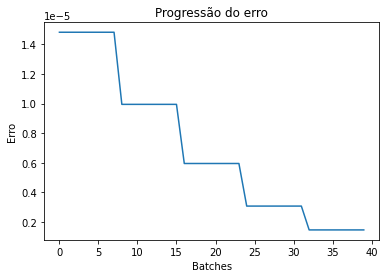

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk('modelo')

## Testes com uma frase

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [ ]:
base_teste.head(10)

,Text,Sentiment
2496,vvs high,1
4559,exc road south clear ... pick,-1
2381,exact reason etfs safe individual stock news k...,1
4407,buy mgm 12.99,1
818,twc way potential breakout channel tgt wht u t...,1
5435,sensex end point high market break 2-day fall \n,1
3197,pk peel 4.16,1
5150,longtail alpha fund capitalize marketsâ€ ™ rea...,1
5102,ge expose way economic downdraft covid-19 fitc...,-1
6,aap user current downtrend break short term co...,-1


### Texto positivo

In [ ]:
texto_positivo = base_teste['Text'][5435]
texto_positivo

'sensex end point high market break 2-day fall \n '

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

sensex end point high market break 2-day fall 
 

In [ ]:
previsao.cats

{'POSITIVO': 0.056167762726545334, 'NEGATIVO': 0.9717701077461243}

In [ ]:
texto_positivo = 'Apple stock is increasing and I will buy for a good price'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'apple stock increase buy good price'

In [ ]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.056167762726545334, 'NEGATIVO': 0.9717701077461243}

### Texto negativo

In [ ]:
texto_negativo = base_teste['Text'][5435]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.056167762726545334, 'NEGATIVO': 0.9717701077461243}

## Avaliação do modelo

In [ ]:
previsoes = []
for texto in base_teste['Text']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes[0:5]

[{'POSITIVO': 0.9965819716453552, 'NEGATIVO': 0.006181993987411261},
 {'POSITIVO': 0.906915545463562, 'NEGATIVO': 0.14544832706451416},
 {'POSITIVO': 0.7966835498809814, 'NEGATIVO': 0.25047338008880615},
 {'POSITIVO': 0.8168837428092957, 'NEGATIVO': 0.1276978850364685},
 {'POSITIVO': 0.8135308623313904, 'NEGATIVO': 0.11455119401216507}]

In [ ]:
len(previsoes)

1738

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final, np.unique(previsoes_final)

(array([1, 1, 1, ..., 1, 1, 1]), array([-1,  1]))

In [ ]:
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.7036823935558113

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[346, 285],
       [230, 877]])

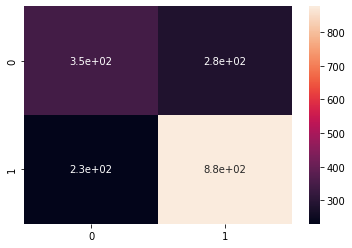

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.60      0.55      0.57       631
           1       0.75      0.79      0.77      1107

    accuracy                           0.70      1738
   macro avg       0.68      0.67      0.67      1738
weighted avg       0.70      0.70      0.70      1738

